In [114]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import time

## Algorithm to determine dominant soil type for each census tract

There are hundreds of thousands of soil points -- this algorithm must be efficient!

In [61]:
def calculate_dominant_soil(points, polygons, results_filename):
    progress = 0
    start_time = time.time()
    point_geometries = points["geometry"]
    num_polys = polygons.shape[0]
    num_points = points.shape[0]
    results = {tract:{"A": 0, "B": 0, "C": 0, "D": 0, "E": 0} for tract in polygons["Tract"]}
    for i, poly in polygons.iterrows():
        # Need to limit print statements to avoid performance decrease, but we still want to monitor progress
        if not progress % 200:
            print("Processing polygon {} of {}. There are {} points remaining.".format(progress, num_polys, points.shape[0]))

        single_poly_geometry = poly["geometry"]
        
        # Using shapely function .contains() to check what points are contained in the polygon.
        within_condition = point_geometries.within(single_poly_geometry)
               
        # Array for the dominant soil.
        dominant_soil = points[within_condition]["3D model"].mode().values
        
        # Default to soil type D if the array is empty, meaning there are no points within the poly
        if dominant_soil.size == 0:
            dominant_soil = 'D'
        # If there are points within, take the last element of the array.
        # For example, take C instead of B if they are tied.
        else:
            dominant_soil = dominant_soil[-1]
        
        # Store the results
        results[poly["Tract"]] = dominant_soil
        
        # Remove the points that are within this polygon; for subsequent polys, these points don't need to be considered
        points = points[~within_condition]
        progress += 1
    # Export results to CSV. Two columns: tract number and dominant soil type.
    pd.Series(results, name=results_filename).to_csv("{}.csv".format(results_filename), header=True)
    time_elapsed = time.time() - start_time
    print("Completed analysis of {} points and {} polygons in {}s".format(num_points, num_polys, time_elapsed))
    # Return the results so we can visually display soils for each tract.
    return results

## QC and ON Point files

In [4]:
# ON soil points (just points that overlap ON census tracts)
ON_point_file = 'May_Analysis_2/soils_all_Ontario_2011_selected.shp'
ON_points = gpd.GeoDataFrame.from_file(ON_point_file).to_crs(epsg=4269)

# QC soil points (just points that overlap QC census tracts)
QC_point_file = 'May_Analysis_2/soils_all_QC_2011_selected.shp'
QC_points = gpd.GeoDataFrame.from_file(QC_point_file).to_crs(epsg=4269)

## Polygons and results

### ON 2011

In [24]:
# 2011 ON polygons, cropped to the area over which we have soil data 
ON_2011_polys_path = 'May_Analysis_2/2011_ON_tracts_selected.shp'
ON_2011_polygons = gpd.GeoDataFrame.from_file(ON_2011_polys_path)

In [32]:
ON_2011_results = calculate_dominant_soil(ON_points, ON_2011_polygons, "ON_2011_soil_results")

Completed analysis of 14011 points and 1698 polygons in 441.90111112594604s


### ON 2006

In [36]:
# 2006 ON polygons, cropped to the area over which we have soil data
ON_2006_polys_path = 'May_Analysis_2/2006_ON_tracts_selected.shp'
ON_2006_polygons = gpd.GeoDataFrame.from_file(ON_2006_polys_path)
ON_2006_results = calculate_dominant_soil(ON_points, ON_2006_polygons, "ON_2006_soil_results")

Completed analysis of 13753 points and 203 polygons in 65.81930470466614s


### QC 2011

In [62]:
# 2011 QC polygons, cropped to the area over which we have soil data 
QC_2011_polys_path = 'May_Analysis_2/2011_QC_tracts_selected.shp'
QC_2011_polygons = gpd.GeoDataFrame.from_file(QC_2011_polys_path).sort_values("Shape_Area", ascending=False)
QC_2011_results = calculate_dominant_soil(QC_points, QC_2011_polygons, "QC_2011_soil_results")

Processing polygon 0 of 11436. There are 257102 points remaining.


C:\Users\ngibb\AppData\Local\Continuum\miniconda3\envs\soils\lib\site-packages\geopandas\geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


Processing polygon 200 of 11436. There are 167633 points remaining.
Processing polygon 400 of 11436. There are 125380 points remaining.
Processing polygon 600 of 11436. There are 95349 points remaining.
Processing polygon 800 of 11436. There are 72807 points remaining.
Processing polygon 1000 of 11436. There are 55496 points remaining.
Processing polygon 1200 of 11436. There are 42708 points remaining.
Processing polygon 1400 of 11436. There are 33696 points remaining.
Processing polygon 1600 of 11436. There are 27129 points remaining.
Processing polygon 1800 of 11436. There are 22639 points remaining.
Processing polygon 2000 of 11436. There are 19623 points remaining.
Processing polygon 2200 of 11436. There are 17571 points remaining.
Processing polygon 2400 of 11436. There are 16106 points remaining.
Processing polygon 2600 of 11436. There are 15090 points remaining.
Processing polygon 2800 of 11436. There are 14342 points remaining.
Processing polygon 3000 of 11436. There are 13718 

### QC 2006

In [74]:
# 2006 QC polygons, cropped to the area over which we have soil data 
QC_2006_polys_path = 'May_Analysis_2/2006_QC_tracts_selected.shp'
QC_2006_polygons = gpd.GeoDataFrame.from_file(QC_2006_polys_path)
QC_2006_results = calculate_dominant_soil(QC_points, QC_2006_polygons, "QC_2006_soil_results")

Processing polygon 0 of 1805. There are 257102 points remaining.
Processing polygon 200 of 1805. There are 246890 points remaining.
Processing polygon 400 of 1805. There are 236234 points remaining.
Processing polygon 600 of 1805. There are 232299 points remaining.
Processing polygon 800 of 1805. There are 231963 points remaining.
Processing polygon 1000 of 1805. There are 230630 points remaining.
Processing polygon 1200 of 1805. There are 221453 points remaining.
Processing polygon 1400 of 1805. There are 139466 points remaining.
Processing polygon 1600 of 1805. There are 66405 points remaining.
Processing polygon 1800 of 1805. There are 8638 points remaining.
Completed analysis of 8632 points and 1805 polygons in 2692.971271753311s


### Mapping the results

#### 2011

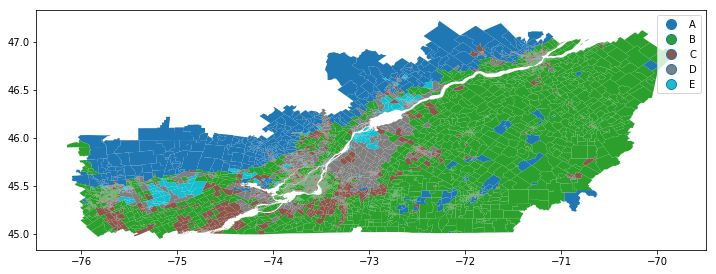

In [113]:
QC_2011_polygons['soil'] = QC_2011_polygons['Tract'].map(QC_2011_results)
ON_2011_polygons['soil'] = ON_2011_polygons['Tract'].map(ON_2011_results)
QC_ON_2011_polygons = pd.concat([ON_2011_polygons, QC_2011_polygons], sort=False)
QC_ON_2011_polygons.plot(column="soil", legend=True, figsize=(12, 12))

#### 2006

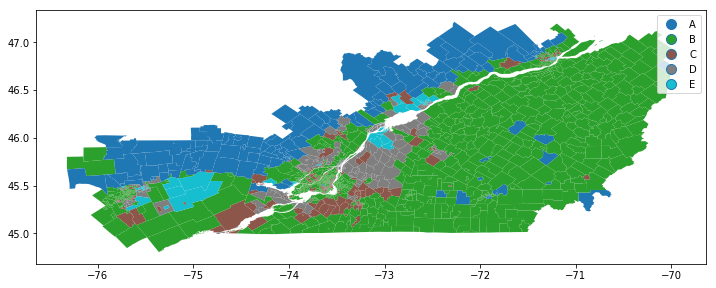

In [116]:
QC_2006_polygons['soil'] = QC_2006_polygons['Tract'].map(QC_2006_results)
ON_2006_polygons['soil'] = ON_2006_polygons['Tract'].map(ON_2006_results)
QC_ON_2006_polygons = pd.concat([ON_2006_polygons, QC_2006_polygons], sort=False)
QC_ON_2006_polygons.plot(column="soil", legend=True, figsize=(12, 12))